In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw10.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Homework 10: Designing Experiments

## References

* [Why the Mean Matters](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)
* [`datascience` Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-sp24/resources/quick-reference.html)

## Assignment Reminders

- Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- For all tasks indicated with a 🔎 that you must write explanations and sentences for, provide your answer in the designated space.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.
- Unless you are asked otherwise, use the non-interactive visualizations when asked to produce a visualization for a task.
- View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details.

Run the following code cell to import the tools for this assignment.

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Bounding the Tail of a Distribution

A community has an average age of 45 years with a standard deviation of 5 years.

In each task in this section, fill in the blank with a percent that makes the statement true **without further assumptions**, and explain your answer.

*Note:* No credit will be given for loose bounds such as "at least 0%" or "at most 100%". Give the best answer that is possible with the information given.

<!-- BEGIN QUESTION -->

### Task 01 📍🔎

At least _______% of the people are between 25 and 65 years old.

_Points:_ 2

At least 93.75% of the people are between 25 and 65 years older. We can use Chebyshev to explain that the probability that someone is more than 4 SDs of the mean is at most 1/16 or 6.25% and the probability that someone is within 4 SDs of the mean is at least 1 - 1/16 or 93.75%. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Task 02 📍🔎

At most _______% of the people have ages that are not in the range 25 years to 65 years.

_Points:_ 2

From the above at most 6.25% are not within 25 to 65 years old. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Task 03 📍🔎

At most _______% of the people are more than 65 years old.

*Hint:* If you're stuck, try thinking about what the distribution may look like in this case.


_Points:_ 2

The probability of being more than 4 SDs above the mean is less than or equal the probability of being more than SDs above or below the mean. Without knowing more about the distribution, we can say from Chebyshev is that at most 6.25% of the people are more than 65 years old. 

<!-- END QUESTION -->

## Sample Size and Confidence Level

A data science class at the large Data 8 University wants to estimate the percentage of Facebook users among students at the school. To do this, they need to take a random sample of students. You can assume that their method of sampling is equivalent to drawing at random with replacement from students at the school.

***Please review [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) of the textbook before proceeding with this section. Your work will go much faster that way!***

### Task 04 📍

Assign `smallest` to the smallest number of students (an integer value) they should sample to ensure that a **95%** confidence interval for the parameter has a width of no more than 6% from the left end to the right end.

*Hint:* How can our data be represented to show if a student in the sample is a Facebook user? Given this, what assumptions can we make for the SD of the population? [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) might be helpful!

*Note:* You can use `np.ceil` to round a float up to the next whole number. Keep in mind that the resulting value will still be a `float` data type. You'll need to convert the float to an integer.

_Points:_ 2

In [3]:
smallest = int(np.ceil((4 * 0.5 / .06) ** 2))
smallest

1112

In [4]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ smallest represents a value between 110 and 1150, inclusive.
task_04 - 2 message: ✅ smallest is an integer.

<!-- BEGIN QUESTION -->

### Task 05 📍🔎

Suppose the data science class decides to construct a 90% confidence interval instead of a 95% confidence interval, but they still require that the width of the interval is no more than 6% from the left end to the right end. Will they need the same sample size as in Task 04? Pick the right answer and explain further without calculation.

1. Yes, they must use the same sample size.
2. No, a smaller sample size will work.
3. No, they will need a bigger sample.


_Points:_ 2

2 is correct. If we decreased confidence level with the same intend of interval width allows an increased standard deviation of the sample means and therefore a decreased sample size. 

<!-- END QUESTION -->

### Task 06 📍

The professor tells the class that a 90% confidence interval for the parameter is constructed exactly like a 95% confidence interval, except that you have to go only 1.65 SDs on either side of the estimate (±1.65) instead of 2 SDs on either side (±2). Assign `smallest_num` to the smallest number of students (an integer) they should sample to ensure that a **90%** confidence interval for the parameter has a width of no more than 6% from the left end to the right end.

*Note:* Make sure you round up your sample size value and make sure it is an integer.


_Points:_ 2

In [5]:
smallest_num = int(np.ceil((1.65 * 2 * 0.5 / .06) ** 2))
smallest_num

757

In [6]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ smallest_num represents a value between 700 and 800, inclusive.
task_06 - 2 message: ✅ smallest_num is an integer.

For this next exercise, please consult [Section 14.3.4](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html#the-standard-normal-cdf) of the textbook for similar examples.

The students are curious about how the professor came up with the value 1.65 in Question 2.3. She says she ran the following two code cells. The first one calls the `datascience` library function `plot_normal_cdf`, which displays the proportion that is at most the specified number of SDs above average under the normal curve plotted with standard units on the horizontal axis. You can find the documentation [here](http://data8.org/datascience/util.html#datascience.util.plot_normal_cdf).

*Note:* The acronym `cdf` stands for `cumulative distribution function`. It measures the proportion to the left of a specified point under a probability histogram.

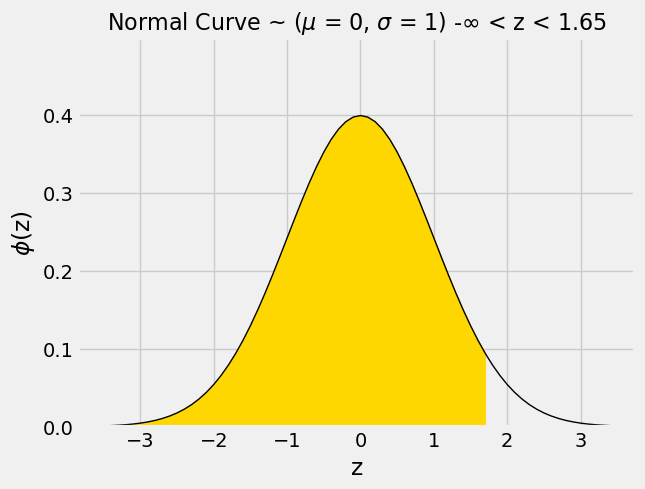

In [7]:
plot_normal_cdf(1.65)

To run the second cell, the professor had to first import a Python library for probability and statistics:

In [33]:
# Just run this cell
from scipy import stats

Then she used the `norm.cdf` method in the library to find the gold proportion above.

In [35]:
# Just run this cell
stats.norm.cdf(1.65)

0.9505285319663519

*Note*: You do not need to understand how the `scipy` library or how to use the method yourself.

<!-- BEGIN QUESTION -->

### Task 07 📍🔎

This shows that the percentage in a normal distribution that is at most 1.65 SDs above average is about **95%**. Explain why 1.65 is the right number of SDs to use when constructing a **90%** confidence interval.

_Points:_ 2

The CDF indicates that the chances of being more than 1.65 SDs above the mean is 1 - 0.95 or 5%. Since the normal curve is symmetric about the mean, the chances of being less than 1.65 SDs below the mean is also 5%. Then there is a 100% - 5% * 2 or 90% chance of being within 1.65 SDs, which is where we get the 90% confidence interval from. 

<!-- END QUESTION -->



In [36]:
# Just run this cell, do not change it.
stats.norm.cdf(2.33)

0.99009692444083575

### Task 08 📍

The cell above shows that the proportion that is at most 2.33 SDs above average in a normal distribution is 99%. Assign `option` to the right option (1, 2, 3, 4) to fill in the blank:

If you start at the estimate and go 2.33 SDs on either side, then you will get a _______% confidence interval for the parameter.

1. 99.5
2. 99
3. 98.5
4. 98



_Points:_ 2

In [37]:
option = 4
option

4

In [38]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ option represents 1, 2, 3, or 4.

## Polling and the Normal Distribution

Michelle is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal and vertical axes) called Yes on 68.  They want to know how many Californians will vote for the proposition.

Michelle polls a uniform random sample of all California voters, and she finds that 210 of the 400 sampled voters will vote in favor of the proposition. We have provided a table for you below which has 3 columns: the first two columns are identical to `sample`. The third column contains the proportion of total voters that chose each option.

In [39]:
sample = Table().with_columns(
    "Vote",  make_array("Yes", "No"),
    "Count", make_array(210,   190))

sample_size = sum(sample.column("Count"))
sample_with_proportions = sample.with_column("Proportion", sample.column("Count") / sample_size)
sample_with_proportions

Vote,Count,Proportion
Yes,210,0.525
No,190,0.475


### Task 09 📍

Michelle wants to use 10,000 bootstrap resamples to compute a confidence interval for the proportion of all California voters who will vote Yes.  

Fill in the next cell to simulate an empirical distribution of Yes proportions. Use bootstrap resampling to simulate 10,000 election outcomes, and assign `resample_yes_proportions` to contain the Yes proportion of each bootstrap resample. Then, visualize `resample_yes_proportions` with a histogram. **You should see a bell-shaped curve centered near the proportion of Yes in the original sample.**

*Hint:* `sample_proportions` may be useful here!


_Points:_ 2

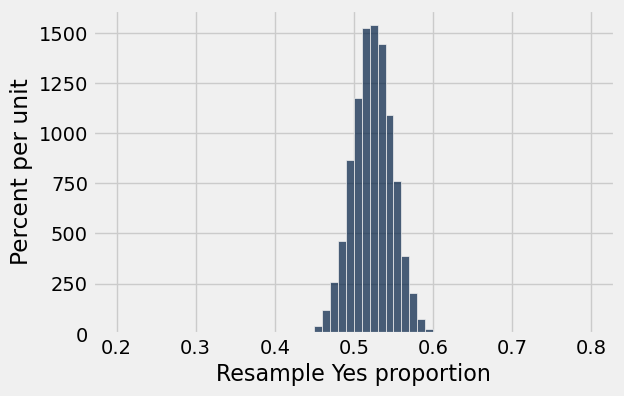

In [40]:
resample_yes_proportions = make_array()
for i in np.arange(10000):
    resample = sample_proportions(400, sample_with_proportions.column('Proportion'))
    resample_yes_proportions = np.append(resample_yes_proportions, resample[0])
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))

In [41]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ resample_yes_proportions contains 10,000 items.
task_09 - 2 message: ✅ The mean and standard deviation of resample_yes_proportions seems possible.

<!-- BEGIN QUESTION -->

### Task 10 📍🔎

Why does the Central Limit Theorem (CLT) apply in this situation, and how does it explain the distribution we see above?


_Points:_ 2

This is the same as sampling from a population with a 1 for yes or a 0 for no and computing the mean. So the CLT should be applicable. 

<!-- END QUESTION -->

In a population whose members are 0 and 1, there is a simple formula for the **standard deviation of that population**:

$$\text{standard deviation of population} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is an fun exercise for those who enjoy algebra.)

### Task 11 📍

 Using only the Central Limit Theorem and the numbers of Yes and No voters in our sample of 400, *algebraically* compute the predicted standard deviation of the `resample_yes_proportions` array. Assign this number to `approximate_sd`. **Do not access the data in `resample_yes_proportions` in any way.**

Remember that the standard deviation of the sample means can be computed from the population SD and the size of the sample (the formula above might be helpful). If we do not know the population SD, we can use the sample SD as a reasonable approximation in its place. [This section](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html#the-sd-of-all-the-sample-means) of the textbook also may be helpful.


_Points:_ 2

In [46]:
approx_pop_sd = np.sqrt(sample_with_proportions.column('Proportion')[0] * sample_with_proportions.column('Proportion')[1])
approximate_sd = approx_pop_sd / 400 ** .5
approximate_sd

0.024968730444297725

In [47]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ approximate_sd is less than 0.025.

### Task 12 📍

Compute the standard deviation of the array `resample_yes_proportions`, which will act as an approximation to the true SD of the possible sample proportions. This will help verify whether your answer to question 3.3 is approximately correct.


_Points:_ 2

In [48]:
exact_sd = np.std(resample_yes_proportions)
exact_sd

0.025074447250886714

In [25]:
grader.check("task_12")

task_12 results: All test cases passed!
task_12 - 1 message: ✅ exact_sd is less than 0.05

### Task 13 📍

**Again, without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California.

The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

*Hint:* How many SDs correspond to 95% of the distribution promised by the CLT? Recall the discussion in the textbook [here](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).

*Hint:* The `approximate_sd` variable you previously defined may be helpful!


_Points:_ 3

In [49]:
lower_limit = sample_with_proportions.column('Proportion')[0] - 2 * approximate_sd
upper_limit = sample_with_proportions.column('Proportion')[0] + 2 * approximate_sd
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.475062539111 upper: 0.574937460889


In [50]:
grader.check("task_13")

task_13 results: All test cases passed!
task_13 - 1 message: ✅ The lower_limit and upper_limit values seem possible.

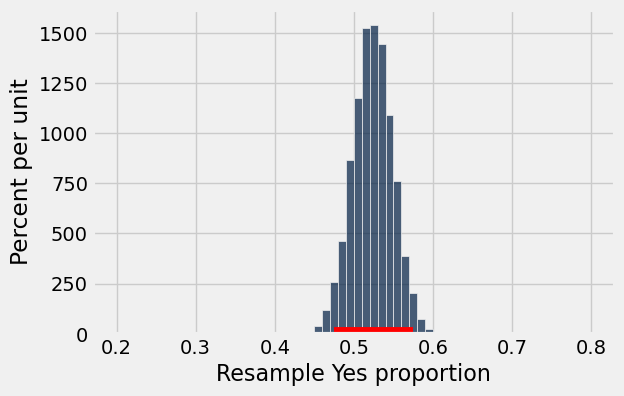

In [51]:
# Run this cell to plot your confidence interval.
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))
plt.plot(make_array(lower_limit, upper_limit), make_array(0, 0), c='r', lw=10);

Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning.  It's impossible to be absolutely sure without polling the whole population, but they'd be okay if the standard deviation of the sample mean were only 0.005.  They ask Michelle to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Michelle consults Chapter 14 of your textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

Under that assumption, Michelle decides that a sample of 9,975 would suffice.

### Task 14 📍

Does Michelle's sample size achieve the desired standard deviation of sample means? What SD would you achieve with a smaller sample size? A higher sample size?

To explore this, first compute the SD of sample means obtained by using Michelle's sample size.

_Points:_ 4

In [53]:
estimated_population_sd = np.sqrt(sample_with_proportions.column('Proportion')[0] * sample_with_proportions.column('Proportion')[1])
michelle_sample_size = 9975
michelle_sample_mean_sd = estimated_population_sd / michelle_sample_size ** .5 
print("With Michelle's sample size, you would predict a sample mean SD of %f." % michelle_sample_mean_sd)

With Michelle's sample size, you would predict a sample mean SD of 0.005000.


In [54]:
grader.check("task_14")

task_14 results: All test cases passed!
task_14 - 1 message: ✅

### Task 15 📍

Next, compute the SD of the sample means that you would get from a smaller sample size. Ideally, you should pick a number that is significantly smaller, but any sample size smaller than Michelle's will do.*


_Points:_ 2

In [55]:
smaller_sample_size = 1000
smaller_sample_mean_sd = estimated_population_sd / smaller_sample_size ** .5
print("With this smaller sample size, you would predict a sample mean SD of %f" % smaller_sample_mean_sd)

With this smaller sample size, you would predict a sample mean SD of 0.015792


In [56]:
grader.check("task_15")

task_15 results: All test cases passed!
task_15 - 1 message: ✅ smaller_sample_size is less than michelle_sample_size.

### Task 16 📍

Finally, compute the SD of the sample means that you would get from a larger sample size. Here, a number that is significantly larger would make any difference more obvious, but any sample size larger than Michelle's will do.

_Points:_ 2

In [57]:
larger_sample_size = 20_000
larger_sample_mean_sd = estimated_population_sd / larger_sample_size ** .5
print("With this larger sample size, you would predict a sample mean SD of %f" % larger_sample_mean_sd)

With this larger sample size, you would predict a sample mean SD of 0.003531


In [58]:
grader.check("task_16")

task_16 results: All test cases passed!
task_16 - 1 message: ✅ larger_sample_size is greater than michelle_sample_size.

### Task 17 📍

Based on this, was Michelle's sample size approximately the minimum sufficient sample, given her assumption that the sample SD is the same as the population SD? Assign `min_sufficient` to `True` if 9,975 was indeed approximately the minimum sufficient sample, and `False` if it wasn't.


_Points:_ 2

In [59]:
min_sufficient = True
min_sufficient

True

In [60]:
grader.check("task_17")

task_17 results: All test cases passed!
task_17 - 1 message: ✅ min_sufficient is a Boolean value.

## Submit your Homework to Canvas

Once you have finished working on the homework tasks, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the rubric to know how you will be scored for this assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `"grader.check_all()"`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
3. Select the menu item "File" and "Save Notebook" in the notebook's Toolbar to save your work and create a specific checkpoint in the notebook's work history.
4. Select the menu items "File", "Download" in the notebook's Toolbar to download the notebook (.ipynb) file. 
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded .ipynb file.

**Keep in mind that the auto-grader does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the auto-grader for a task does not mean you got the answer correct for that task.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [61]:
grader.check_all()

task_04 results: All test cases passed!
task_04 - 1 message: ✅ smallest represents a value between 110 and 1150, inclusive.
task_04 - 2 message: ✅ smallest is an integer.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ smallest_num represents a value between 700 and 800, inclusive.
task_06 - 2 message: ✅ smallest_num is an integer.

task_08 results: All test cases passed!
task_08 - 1 message: ✅ option represents 1, 2, 3, or 4.

task_09 results: All test cases passed!
task_09 - 1 message: ✅ resample_yes_proportions contains 10,000 items.
task_09 - 2 message: ✅ The mean and standard deviation of resample_yes_proportions seems possible.

task_11 results: All test cases passed!
task_11 - 1 message: ✅ approximate_sd is less than 0.025.

task_12 results: All test cases passed!
task_12 - 1 message: ✅ exact_sd is less than 0.05

task_13 results: All test cases passed!
task_13 - 1 message: ✅ The lower_limit and upper_limit values seem possible.

task_14 results: All test cases p